In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2022, 9, 3)

In [3]:
DATA = '../data'

sp1950 = pd.read_csv(f'{DATA}/sp1950.csv')
nya1965 = pd.read_csv(f'{DATA}/nya1965.csv')
nasdaq1965 = pd.read_csv(f'{DATA}/nasdaq1965.csv')
wilshire1990 = pd.read_csv(f'{DATA}/wilshire1990.csv')


nasdaq1965.tail()
states = pd.read_csv(f'{DATA}/hmm_exp_returns.csv')
states.index = pd.to_datetime(states.Date)
states.tail()

,Date,sp,sp_daily,sp_exp,nyse,nyse_daily,nyse_exp,nas,nas_daily,nas_exp,wil,wil_daily,wil_exp,mean_exp,state
Date,,,,,,,,,,,,,,,
2022-08-29,2022-08-29,4030.610107,0.993334,1.000213,15118.849609,0.996089,0.999861,12017.669922,0.989784,1.000509,40313.238281,0.992967,1.000333,1.000229,1
2022-08-30,2022-08-30,3986.159912,0.988972,1.000213,14931.419922,0.987603,0.999861,11883.139648,0.988806,1.000509,39856.000000,0.988658,1.000333,1.000229,1
2022-08-31,2022-08-31,3955.000000,0.992183,1.000213,14801.240234,0.991281,0.999861,11816.200195,0.994367,1.000509,39560.859375,0.992595,1.000333,1.000229,1
2022-09-01,2022-09-01,3966.850098,1.002996,1.000213,14771.900391,0.998018,0.999861,11785.129883,0.997371,1.000509,39571.890625,1.000279,1.000333,1.000229,1
2022-09-02,2022-09-02,3924.260010,0.989263,1.000213,14689.501953,0.994422,0.999861,11630.864258,0.986910,1.000509,39180.414062,0.990107,1.000333,1.000229,1


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'IDXX',
    'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT',
    'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC',
    'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU',
    'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD',
    'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN',
    'ZM']
BEST_0 = [
    'AMRK', 'APT', 'EP', 'ESOA', 'GBOX', 'INTZ', 'MCVT','MICS', 'MTA',
    'PRPH']
BEST_1 = [
    'CUBE', 'EVR', 'EXR', 'LSI', 'NSA', 'PSA', 'REXR', 'TSLA','TWNK',
    'WCN']
len(SYMBOLS)

68

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 10
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2012, 9, 5), datetime.date(2022, 9, 3))

In [6]:
batch = sorted(SYMBOLS + BEST_0 + BEST_1) #+ INDICES

In [7]:
data = (
    yf
    .download(batch, start=START, end=TODAY)
    .rename(columns={'Adj Close': 'AdjClose'})
    .sort_index())

[*********************100%***********************]  88 of 88 completed


In [8]:
data['state'] = states.state
data.tail()

AdjClose                                                         \
                  AAPL        ABMD        ABNB        ADBE   ADYEY        AMD   
Date                                                                            
2022-08-29  161.380005  256.980011  113.540001  375.260010  15.830  88.489998   
2022-08-30  158.910004  258.649994  112.559998  375.070007  15.740  86.940002   
2022-08-31  157.220001  259.279999  113.120003  373.440002  15.510  84.870003   
2022-09-01  157.960007  259.529999  113.400002  370.529999  14.970  82.330002   
2022-09-02  155.809998  261.239990  113.639999  368.140015  14.675  80.239998   

                                                     ...      Volume          \
                 AMRK        AMZN        ANET   APT  ...        TWTR     TYL   
Date                                                 ...                       
2022-08-29  36.410000  129.789993  121.580002  4.10  ...   6695800.0  123900   
2022-08-30  35.299999  128.729996  121.099998  4.14  ...   9617900.0  131900   
2022-08-31  30.910000  126.769997  119.879997  4.13  ...  16862800.0  217400   
2022-09-01  27.990000  127.820000  117.279999  4.25  ...   8607800.0  235600   
2022-09-02  28.910000  127.510002  117.300003  4.16  ...   7923200.0  117800   

                                                                             \
                 UPST       VEEV        VLD      WCN        XPEV        ZEN   
Date                                                                          
2022-08-29  5273400.0  1056000.0   968000.0   682200   9490400.0  2264100.0   
2022-08-30  5094600.0   943200.0   814500.0   842500  14484300.0  2317000.0   
2022-08-31  9094400.0  1291900.0  1600700.0  1164400  12882900.0  2441100.0   
2022-09-01  6069500.0  4330700.0  1252500.0  1474800  16912700.0  1590300.0   
2022-09-02  6323400.0  1480000.0  1511200.0  1457700  12387600.0  1068800.0   

                      state  
                   ZM        
Date                         
2022-08-29  5211000.0     1  
2022-08-30  4142500.0     1  
2022-08-31  4838000.0     1  
2022-09-01  6795400.0     1  
2022-09-02  4568800.0     1  

[5 rows x 529 columns]

In [9]:
STATES = sorted(states.state.unique())
STATES

[0, 1, 2, 3, 4, 5]

In [10]:
CURRENT_STATE = states.state[-1]
CURRENT_STATE

1

In [11]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [12]:
def get_daily_returns(x):
    idx = x.index
    n = len(x)
    x = np.array(x)
    #return x[2:n] / x[1:(n - 1)] - 1 
    returns = x[1:n] / x[0:(n-1)] - 1
    returns = pd.Series(returns, index=idx[1:])
    return returns

In [13]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [14]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [15]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [16]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [17]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [18]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [19]:
EXAMPLE = 'APT'

In [20]:
stock_data = get_stock_data(EXAMPLE, data.copy())
daily_returns = get_daily_returns(stock_data.AdjClose)
daily_returns
(get_sharpe(daily_returns), 
 get_sharpe(daily_returns[data.state == CURRENT_STATE]))

(0.4893128704566177, 0.27169423828439265)

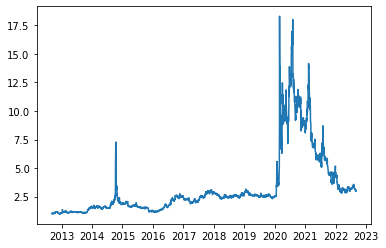

In [21]:
plt.plot(
    (get_daily_returns(data[('AdjClose', EXAMPLE)]) + 1).cumprod());

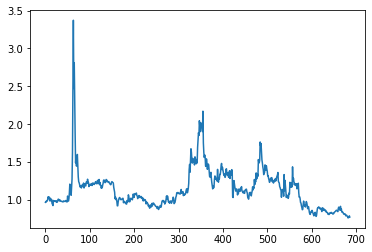

In [22]:
dr = get_daily_returns(
    data[('AdjClose', EXAMPLE)]
)[states.state == CURRENT_STATE]
dr = dr[dr.notnull()]
plt.plot((dr + 1).to_numpy().cumprod());

In [23]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    daily_returns = get_daily_returns(stock_data.AdjClose)
    sharpe = get_sharpe(daily_returns)
    state_sharpe = get_sharpe(daily_returns[data.state == CURRENT_STATE])
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (
        stock_data.AdjClose.rolling(window=WINDOW).max())
    stock_data['ann_low'] = (
        stock_data.AdjClose.rolling(window=WINDOW).min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = (
        (stock_data.Close + stock_data.High + stock_data.Low + stock_data.Open) 
        / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    stock_data['dev'] = np.array(range(n)) / n
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.Close, label='Close')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.legend();
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.title(stock)
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(
            np.sqrt(stock_data.drawdown * stock_data.pullup),
            color='grey',
            label='geomean')
        plt.yscale('log')
        plt.legend()
    return (
        stock_data.direction.tolist()[-1],
        stock_data.rsi.tolist()[-1],
        stock_data.resid.tolist()[-1], 
        stock_data.dev.tolist()[-1],
        stock_data.drawdown.tolist()[-1],
        stock_data.pullup.tolist()[-1],
        sharpe,
        state_sharpe)

(0,
 0.13389288569144683,
 0.24324324324324326,
 0.24324324324324326,
 0.5413879598662207,
 0.3039297658862876,
 0.4893128704566177,
 0.27169423828439265)

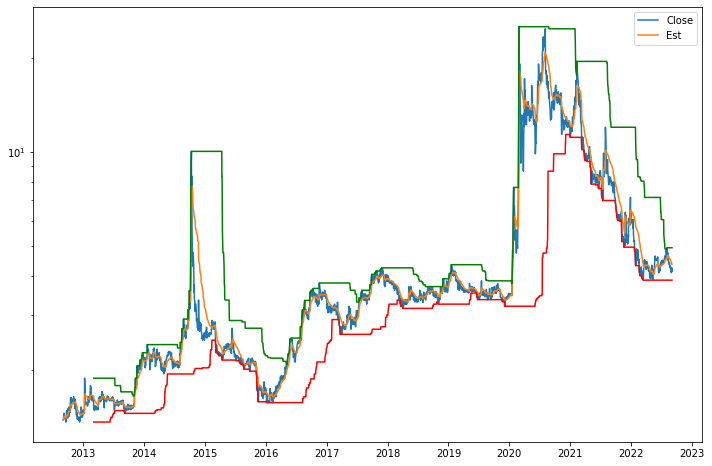

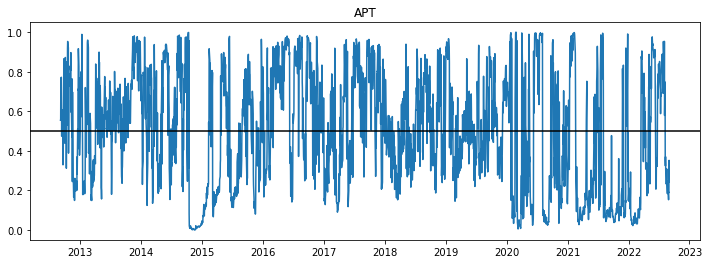

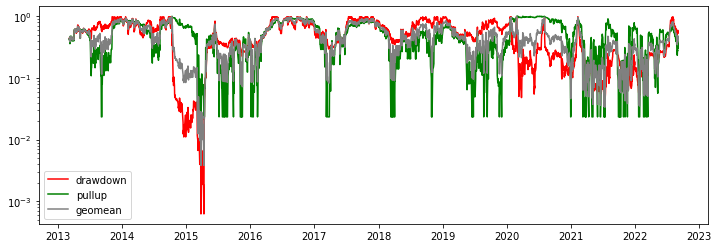

In [24]:
process_stock(EXAMPLE, data.copy(), plot=True)

In [25]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    stock_stats = process_stock(stock, data)
    out.append([stock, *stock_stats])

AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BYND... CHWY... CUBE... DDOG... DOCS... DOCU... DUOL... EDIT... EP... ESOA... ETSY... EVR... EXR... FLGT... GBOX... GH... GMED... GOOG... IDXX... INTG... INTZ... ISRG... JD... LSI... LSPD... LULU... MCVT... MDB... MELI... MICS... MNST... MSFT... MTA... MTCH... NSA... NVCR... NVDA... OKTA... OPEN... PAC... PANW... PAYC... PINS... PRPH... PSA... PYPL... QDEL... RBLX... RDFN... REXR... RGEN... RIVN... ROKU... RVLV... SE... SHOP... SNOW... TASK... TDOC... TEAM... TREX... TSLA... TTD... TTWO... TWLO... TWNK... TWTR... TYL... UPST... VEEV... VLD... WCN... XPEV... ZEN... ZM... 

In [26]:
out = pd.DataFrame(
    data=out, 
    columns=['stock', 'direction', 'RSI', 'fair_value_mult', 
             'dev_quantile', 'drop','climb', 'sharpe', 'state_sharpe'])
out['geomean'] = np.sqrt(out['drop'] * out.climb)
out['score'] = (out.fair_value_mult
                * out.dev_quantile
                * out['drop']
                * out.climb) ** (1/4) 
out['RSIRev'] = 1 - out.RSI
out = out[['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
           'dev_quantile', 'drop', 'climb','geomean', 'score', 
           'sharpe', 'state_sharpe']]
out.RSI.fillna(out.RSI.median())
out.RSIRev.fillna(out.RSIRev.median())

out.sort_values('stock')

,stock,direction,RSI,RSIRev,fair_value_mult,dev_quantile,drop,climb,geomean,score,sharpe,state_sharpe
0,AAPL,0,0.101119,0.898881,0.525835,0.525835,0.229933,0.383361,0.296896,0.395118,0.849926,0.759213
1,ABMD,0,0.188249,0.811751,0.215024,0.215024,0.199415,0.264214,0.229539,0.222163,0.775813,1.021237
2,ABNB,1,0.509479,0.490521,0.451835,0.451835,0.233974,0.717949,0.409856,0.430334,0.045798,0.373797
3,ADBE,0,0.010392,0.989608,0.018680,0.018680,0.065217,0.030936,0.044918,0.028967,0.952972,0.490577
4,ADYEY,0,0.063712,0.936288,0.024457,0.024457,0.207516,0.269608,0.236533,0.076058,0.834833,0.533572
...,...,...,...,...,...,...,...,...,...,...,...,...
83,VLD,0,0.610687,0.389313,0.294840,0.294840,0.286219,0.950530,0.521594,0.392157,-0.336097,0.503719
84,WCN,1,0.577938,0.422062,0.903816,0.903816,0.484114,0.720318,0.590522,0.730563,1.164071,2.096513
85,XPEV,0,0.006061,0.993939,0.047151,0.047151,0.212987,0.024675,0.072495,0.058466,0.314181,-0.338006
86,ZEN,1,0.609240,0.390760,0.423996,0.423996,0.032774,0.633384,0.144079,0.247162,0.688349,1.772869


In [27]:
out.geomean.quantile([0.05, 0.99])

0.05    0.030753
0.99    0.809729
Name: geomean, dtype: float64

In [28]:
out.to_csv('individ_quantiles.csv', index=False)

In [29]:
!open individ_quantiles.csv